# Dictionary Composition of News Posts from a Climate Focusing Window

## 1. Environment Creation

In [1]:
''' DATA '''
import pandas as pd
import numpy as np

''' TOPIC MODELING '''
import pickle
from bertopic import BERTopic

''' NATURAL LANGUAGE PROCESSING '''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import regex as re

''' DATA VISUALIZATION '''
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
''' DATA IMPORT '''
headlines = pd.read_excel("Climate Headlines - January 9th.xlsx")
headlines.drop(columns='Unnamed: 0',inplace=True)

##### 1.2.1.1 Some Light Data Cleaning

In [11]:
def number_remover(text):
    new_text = re.sub("\d","",text)
    clean_text = re.sub("[.,?!#$%<>\-_]","",new_text)
    return (clean_text)



In [12]:
headlines['clean text'] = headlines['headline clean'].apply(lambda x: number_remover(x))

### 1.2 Importing the Topic Model

In [13]:
topic_model = topic_model = BERTopic.load("nataliecastro/bsky-climate-posts")

### Value Counts + Assigning Document Probability

In [14]:
''' CLASSIFYING THE TOPICS '''
news = headlines['clean text'].to_list()

probable_news_topics = []
for headline in news:
    current_topic, similarity = topic_model.find_topics(headline,top_n=1)
    probable_news_topics.append(current_topic[0])

In [16]:
''' CREATING THE DATAFRAME '''
news_topics = pd.DataFrame()
news_topics['Headline'] = news
news_topics['Topic'] = probable_news_topics

In [17]:
''' FINDING THE TOPIC NAMES'''
topic_info = topic_model.get_topic_info()
topic_names = topic_info[['Topic','Name']]

In [18]:
''' MERGING TOPIC NAMES TO NEWS HEADLINES '''
news_topics = news_topics.merge(right=topic_names,on='Topic')

In [19]:
news_topics

,Headline,Topic,Name
0,"i class=""cssqtgz""/ispan ariahidden=""true""@nytc...",179,179_insideclimatenewsorgnews_wwwclimategovnews...
1,Jurassic footprints unearthed on ‘dinosaur hi...,43,43_fossils_fossil_fossilized_old
2,Scientists discover millionyearold fossils,43,43_fossils_fossil_fossilized_old
3,Human composting is rising in popularity as an...,221,221_recycling_reuse_recycle_waste
4,The ‘world’s largest’ vacuum to suck climate p...,8,8_air_pollution_health_smoke
...,...,...,...
126,"svg class=""msqjlax snsfknj"" viewbox="" "" xmln...",94,94_det_er_som_av
127,"svg class=""msqjlax snsfknj"" viewbox="" "" xmln...",94,94_det_er_som_av
128,"div class=""promopremiumcontentlabelwrap""/divdi...",78,78_earthquakes_concrete_brick_zone
129,"div class=""ptitlespacer""Magnitude earthquake ...",78,78_earthquakes_concrete_brick_zone


In [31]:
value_counts = pd.DataFrame(news_topics.value_counts("Name"))

In [33]:
## Fixing the indices
value_counts.reset_index(inplace=True)

In [35]:
value_counts.rename(columns={"Name":"Name",0:"Frequency"},inplace=True)

In [37]:
value_counts['Percentage'] = value_counts['Frequency'] / 131 ## value here is generated based on the 

In [38]:
value_counts

,Name,Frequency,Percentage
0,60_climateemergency_climatecrisis_wwwthegodpod...,39,0.297710
1,103_media_mainstream_rightwing_political,12,0.091603
2,125_emissions_reduce_co_aviation,6,0.045802
3,23_california_wildfires_southern_fires,5,0.038168
4,194_wwwtodaycomnewsclimate_noaa_article_enso,5,0.038168
5,5_energy_renewable_renewables_solar,5,0.038168
6,10_drought_rain_water_dry,5,0.038168
7,58_threshold_warming_exceeded_crossed,4,0.030534
8,18_sustainability_sustainable_goals_development,4,0.030534
9,135_hurricanes_floods_tornadoes_droughts,3,0.022901


## 2. Code Necessary to Compute Value Counts

In [39]:
''' DICTIONARY DEFINITION '''
climate_change = ["global warming","climate change","greenhouse gas","greenhouse gases"]
science = ["scientist","scientists","research","researchers","researching","researched",
           "professor","professors"]
policy_management = ["policy","legislation","FEMA","management","disaster respons",'government']

republican = ['republican','republicans','GOP','conservative','conservatives','MAGA']
democrat = ['democrat','democrats','liberal','liberals',"DNC"]

eaej = ['resilience','just transition','climate justice','environmental justice',
                  'climate activism','climate anxiety','environmental racism','ecoside']

focusing_event = ['insurrection','wildfires','inauguration']

word_counter = {"global warming":0,"climate change":0,"greenhouse gas":0,"greenhouse gases":0,
             "scientist":0,"scientists":0,"research":0,"researchers":0,"researching":0,"researched":0,
             "professor":0,"professors":0, "policy":0,"legislation":0,"FEMA":0,"management":0,"disaster respons":0,'government':0,
             'republican':0,'republicans':0,'GOP':0,'conservative':0,'conservatives':0,'MAGA':0,
             'democrat':0,'democrat':0,'liberal':0,'liberals':0,"DNC":0,
               'resilience':0,'just transition':0,'climate justice':0,'environmental justice':0,
                  'climate activism':0,'climate anxiety':0,'environmental racism':0,'ecoside':0,
               'insurrection':0,'wildfires':0,'inaguration':0}

climate_words = list(word_counter.keys())

In [40]:
semantic_topics_nested = []
for word in climate_words:
    related_tuple = topic_model.find_topics(search_term=word)
    related_topics = related_tuple[0]
    
    semantic_topics_nested.append(related_topics)
    
semantic_topics = sum(semantic_topics_nested, [])

In [41]:
semantic_topics = list(set(semantic_topics))

In [42]:
semantic_topics_nested

[[87, 60, 85, 256, 155],
 [60, 155, 87, 85, 11],
 [56, 72, 181, 218, 125],
 [56, 72, 181, 218, 125],
 [163, 212, 206, 219, 230],
 [163, 212, 206, 219, 158],
 [163, 212, 3, 219, 203],
 [163, 212, 206, 219, 149],
 [163, 212, 31, 3, 230],
 [212, 163, 283, 219, 206],
 [101, 19, 176, 163, 254],
 [101, 163, 212, 19, 219],
 [84, 0, 272, 185, 213],
 [211, 185, 84, 203, 147],
 [93, 4, 159, 88, 15],
 [41, 18, 86, 185, 203],
 [38, 257, 24, 2, 271],
 [84, 86, 236, 83, 220],
 [21, 136, 83, 236, 15],
 [21, 136, 83, 236, 15],
 [21, 136, 83, 15, 223],
 [21, 136, 83, 104, 147],
 [21, 136, 83, 104, 147],
 [93, 15, 284, 104, 151],
 [21, 83, 136, 236, 220],
 [21, 136, 83, 275, 104],
 [21, 136, 83, 89, 122],
 [83, 21, 136, 6, 223],
 [2, 24, 38, 257, 49],
 [11, 169, 275, 87, 224],
 [60, 49, 155, 56, -1],
 [49, 18, 8, 22, 125],
 [60, 155, 56, 87, 125],
 [60, 155, 85, 10, 87],
 [49, 22, 8, 18, 125],
 [209, 264, 181, 155, 151],
 [89, 250, 270, 185, 147],
 [4, 20, 69, 23, 159],
 [188, 230, 226, 158, 185]]

In [43]:
climate_topics = topic_model.get_topics(semantic_topics,)

In [44]:
topic_model.get_topic_info(semantic_topics[9])

,Topic,Count,Name,Representation,Representative_Docs
0,10,322,10_drought_rain_water_dry,"[drought, rain, water, dry, droughts, severe, ...",NaN


In [45]:
climate_topic_info = []

for topic in semantic_topics:
    current_info = topic_model.get_topic_info(topic)
    climate_topic_info.append(current_info)
    
climate_topics = pd.concat(climate_topic_info)

In [46]:
semantic_topics_nested = []
for word in climate_words:
    related_tuple = topic_model.find_topics(search_term=word)
    related_topics = related_tuple[0]
    
    semantic_topics_nested.append(related_topics)
    
semantic_topics = sum(semantic_topics_nested, [])

In [47]:
labels = {}
for nest in range(0,len(semantic_topics_nested)):
    topic_nest = semantic_topics_nested[nest]
    related_word = climate_words[nest]
    
    labels[related_word] = topic_nest

In [48]:
labels

{'global warming': [87, 60, 85, 256, 155],
 'climate change': [60, 155, 87, 85, 11],
 'greenhouse gas': [56, 72, 181, 218, 125],
 'greenhouse gases': [56, 72, 181, 218, 125],
 'scientist': [163, 212, 206, 219, 230],
 'scientists': [163, 212, 206, 219, 158],
 'research': [163, 212, 3, 219, 203],
 'researchers': [163, 212, 206, 219, 149],
 'researching': [163, 212, 31, 3, 230],
 'researched': [212, 163, 283, 219, 206],
 'professor': [101, 19, 176, 163, 254],
 'professors': [101, 163, 212, 19, 219],
 'policy': [84, 0, 272, 185, 213],
 'legislation': [211, 185, 84, 203, 147],
 'FEMA': [93, 4, 159, 88, 15],
 'management': [41, 18, 86, 185, 203],
 'disaster respons': [38, 257, 24, 2, 271],
 'government': [84, 86, 236, 83, 220],
 'republican': [21, 136, 83, 236, 15],
 'republicans': [21, 136, 83, 236, 15],
 'GOP': [21, 136, 83, 15, 223],
 'conservative': [21, 136, 83, 104, 147],
 'conservatives': [21, 136, 83, 104, 147],
 'MAGA': [93, 15, 284, 104, 151],
 'democrat': [21, 83, 136, 236, 220],


In [50]:
climate_change_topics = [87, 60, 256, 155, 85, 11,56, 72, 181, 218, 125]
science_topics = [163, 212, 206, 219, 230, 158, 3,203,149,31,283,101, 19, 176, 163, 254]
policy_topics = [84, 0, 272, 185, 213,93, 4, 159, 88, 15,
                 211, 203, 147, 41, 18, 86,38, 257, 24, 2, 271, 236, 83, 220]
republican_topics = [21, 136, 83, 236, 15,223,104,147,93, 15, 284, 104, 151]
democrat_topics = [21, 83, 136, 236, 220,89,122,6,223]
eaej_topics = [ 2, 24, 38, 257, 49, 11, 169, 275, 87, 224, 60, 49, 155, 56, -1,
               18, 8, 22, 125, 60, 155, 56, 85, 10, 87, 209, 264, 181, 151]

focusing_event_topics =  [89, 250, 270, 185, 147, 4, 20, 69, 23, 159, 188, 230, 226, 158]

In [51]:
climate_topics = climate_topics.sort_values(by='Count',ascending=False)

In [52]:
climate_topics

,Topic,Count,Name,Representation,Representative_Docs
0,11,895,11_change_climate_changing_it,"[change, climate, changing, it, about, years, ...",NaN
0,0,708,0_insurance_companies_risk_insurers,"[insurance, companies, risk, insurers, home, a...",NaN
0,2,602,2_resilience_strength_mental_life,"[resilience, strength, mental, life, your, com...",NaN
0,4,521,4_wildfires_angeles_los_wildfire,"[wildfires, angeles, los, wildfire, conditions...",NaN
0,3,490,3_ai_data_use_using,"[ai, data, use, using, tech, centers, energy, ...",NaN
...,...,...,...,...,...
0,270,24,270_prison_incarcerated_abolition_prisoners,"[prison, incarcerated, abolition, prisoners, g...",NaN
0,272,23,272_hurt_politely_problems_exhausting,"[hurt, politely, problems, exhausting, strike,...",NaN
0,254,23,254_superman_guests_dylan_earthquake,"[superman, guests, dylan, earthquake, hotel, i...",NaN
0,223,21,223_funeral_obama_carters_carter,"[funeral, obama, carters, carter, cordial, pre...",NaN


In [53]:
value_counts

,Name,Frequency,Percentage
0,60_climateemergency_climatecrisis_wwwthegodpod...,39,0.297710
1,103_media_mainstream_rightwing_political,12,0.091603
2,125_emissions_reduce_co_aviation,6,0.045802
3,23_california_wildfires_southern_fires,5,0.038168
4,194_wwwtodaycomnewsclimate_noaa_article_enso,5,0.038168
5,5_energy_renewable_renewables_solar,5,0.038168
6,10_drought_rain_water_dry,5,0.038168
7,58_threshold_warming_exceeded_crossed,4,0.030534
8,18_sustainability_sustainable_goals_development,4,0.030534
9,135_hurricanes_floods_tornadoes_droughts,3,0.022901


In [54]:
def topic_num(topic_name):
    pattern = r"[0-9]{1,3}"
    
    found = re.findall(pattern,topic_name)
    string_found = found[0]
    int_found = int(string_found)
    return (int_found)

In [55]:
value_counts['Topic'] = value_counts['Name'].apply(lambda x: topic_num(x))

In [56]:
def dictionary_filter(topic_dictionary):
    frequencies = []
    for topic in topic_dictionary:
        topic_condition = value_counts['Topic'] == topic
        
        current_frequency = value_counts[topic_condition]
        if len(current_frequency) != 0:
            frequency = current_frequency.iloc[0,1]

            current_frequency = {"topic":topic,"frequency":frequency}
        else:
            current_frequency = {"topic":topic,"frequency":0}
        
        frequencies.append(current_frequency)
        
    return (pd.DataFrame(frequencies))

In [57]:
climate_change_freqs = dictionary_filter(climate_change_topics)
science_freqs = dictionary_filter(science_topics)
policy_freqs = dictionary_filter(policy_topics)
republican_freqs = dictionary_filter(republican_topics)
democrat_freqs = dictionary_filter(democrat_topics)
eaej_freqs = dictionary_filter(eaej_topics)
focusing_event_freqs = dictionary_filter(focusing_event_topics)

frequencies = [climate_change_freqs,science_freqs,policy_freqs,republican_freqs,
              democrat_freqs,eaej_freqs,focusing_event_freqs]

dictionary_names = ["Climate Change","Science",'Policy','Republican','Democrat','Environmental Action\n& Environmental Justice','Focusing Moments']

In [58]:
dictionary_values = []
for i in range(0,len(dictionary_names)):
    current_dictionary = dictionary_names[i]
    
    current_freq = frequencies[i]
    desc = current_freq.describe()
    mean = desc.iloc[1,1]
    min_ = desc.iloc[3,1]
    max_ = desc.iloc[7,1]
    freq = current_freq['frequency'].sum()
    
    dictionary_topic_info = {"Dictionary":current_dictionary,"Total Frequency":freq,
                            "Average Topic Size":mean,"Maximum Topic Size":max_,"Minimum Topic Size":min_}
    
    dictionary_values.append(dictionary_topic_info)
    
    print (current_dictionary,"-----------------")
    print (f"Total Frequency: {freq}\nMean: {mean}\nMin: {min_}\nMax: {max_}\n")

Climate Change -----------------
Total Frequency: 47
Mean: 4.2727272727272725
Min: 0.0
Max: 39.0

Science -----------------
Total Frequency: 0
Mean: 0.0
Min: 0.0
Max: 0.0

Policy -----------------
Total Frequency: 8
Mean: 0.3333333333333333
Min: 0.0
Max: 4.0

Republican -----------------
Total Frequency: 0
Mean: 0.0
Min: 0.0
Max: 0.0

Democrat -----------------
Total Frequency: 0
Mean: 0.0
Min: 0.0
Max: 0.0

Environmental Action
& Environmental Justice -----------------
Total Frequency: 103
Mean: 3.5517241379310347
Min: 0.0
Max: 39.0

Focusing Moments -----------------
Total Frequency: 7
Mean: 0.5
Min: 0.0
Max: 5.0



In [59]:
values = pd.DataFrame(dictionary_values).sort_values(by='Total Frequency',ascending=False)
values 

,Dictionary,Total Frequency,Average Topic Size,Maximum Topic Size,Minimum Topic Size
5,Environmental Action\n& Environmental Justice,103,3.551724,39.0,0.0
0,Climate Change,47,4.272727,39.0,0.0
2,Policy,8,0.333333,4.0,0.0
6,Focusing Moments,7,0.500000,5.0,0.0
1,Science,0,0.000000,0.0,0.0
3,Republican,0,0.000000,0.0,0.0
4,Democrat,0,0.000000,0.0,0.0


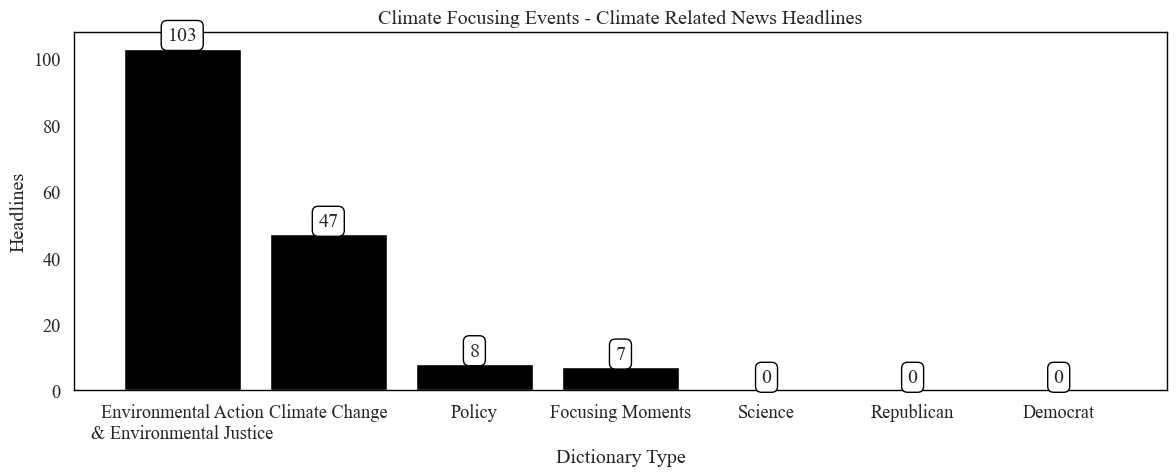

In [60]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,5 )) 



hist = sb.barplot(values,x="Dictionary",y="Total Frequency",color="black")


for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

hist.set_title("Climate Focusing Events - Climate Related News Headlines")
hist.set_xlabel("Dictionary Type")
hist.set_ylabel("Headlines")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Climate Focusing Events - Climate Related News Headlines.png",dpi=2500)
plt.show();